Import Packages

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [22]:
parent_dir = '../../../data/thread_ring/4/'

N = 10_000_000
R = 100_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}7/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}7/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}7/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}7/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [23]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 19 01:34:36 2025 +0200) (509.22ms ela...,0.374,0.0321,0.429,0.97,0.18,12.62,48.63 C,Nominal
1,(Sat Apr 19 01:34:37 2025 +0200) (508.97ms ela...,3.320,0.1080,0.676,4.14,0.64,46.94,49.34 C,Nominal
2,(Sat Apr 19 01:34:37 2025 +0200) (508.58ms ela...,0.286,0.0403,0.414,0.82,0.18,12.69,48.97 C,Nominal
3,(Sat Apr 19 01:34:38 2025 +0200) (509.06ms ela...,0.262,0.0402,0.411,0.79,0.18,12.60,48.97 C,Nominal
4,(Sat Apr 19 01:34:38 2025 +0200) (510.51ms ela...,0.258,0.0264,0.411,0.77,0.18,12.58,48.57 C,Nominal


In [24]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(3233, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 19 01:34:48 2025 +0200) (1008.48ms el...,36.6,0.0740,1.35,39.33,3.93,98.60,48.27 C,Nominal
1,(Sat Apr 19 01:34:49 2025 +0200) (1006.77ms el...,35.2,0.0654,1.30,38.56,3.88,97.91,52.79 C,Nominal
2,(Sat Apr 19 01:34:50 2025 +0200) (1005.92ms el...,34.5,0.0714,1.30,37.86,3.87,98.02,56.08 C,Nominal
3,(Sat Apr 19 01:34:51 2025 +0200) (1005.19ms el...,34.8,0.0710,1.35,38.35,3.87,97.51,58.50 C,Nominal
4,(Sat Apr 19 01:34:52 2025 +0200) (1005.93ms el...,34.4,0.0702,1.42,37.93,3.89,97.97,60.96 C,Nominal


In [25]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 21:14:53 2025 +0200) (510.25ms ela...,0.2610,0.000,0.256,0.35,0.07,5.34,51.83 C,Nominal
1,(Fri Apr 18 21:14:54 2025 +0200) (508.68ms ela...,1.1600,0.099,0.359,1.45,0.27,22.60,51.95 C,Nominal
2,(Fri Apr 18 21:14:54 2025 +0200) (509.12ms ela...,0.0707,0.000,0.250,0.12,0.03,2.20,51.95 C,Nominal
3,(Fri Apr 18 21:14:55 2025 +0200) (508.86ms ela...,0.1010,0.000,0.279,0.17,0.05,3.51,51.97 C,Nominal
4,(Fri Apr 18 21:14:55 2025 +0200) (508.17ms ela...,0.0532,0.000,0.273,0.09,0.03,2.17,51.97 C,Nominal


In [26]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(4478, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Fri Apr 18 21:15:05 2025 +0200) (1010.50ms el...,18.5,0.0,0.721,19.21,2.28,95.81,53.00 C,Nominal
1,(Fri Apr 18 21:15:06 2025 +0200) (1004.94ms el...,18.0,0.0,0.680,18.73,2.18,95.95,54.82 C,Nominal
2,(Fri Apr 18 21:15:07 2025 +0200) (1007.08ms el...,18.1,0.0,0.673,18.81,2.17,96.11,56.28 C,Nominal
3,(Fri Apr 18 21:15:08 2025 +0200) (1006.66ms el...,17.9,0.0,0.651,18.64,2.16,95.93,57.66 C,Nominal
4,(Fri Apr 18 21:15:09 2025 +0200) (1007.01ms el...,18.0,0.0,0.650,18.68,2.14,96.17,58.72 C,Nominal


Clean the Data

In [27]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [28]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [29]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-19 01:34:36,0.374,0.0321,0.429,0.97,0.18,12.62,48.63,Nominal,509.22
1,2025-04-19 01:34:37,3.320,0.1080,0.676,4.14,0.64,46.94,49.34,Nominal,508.97
2,2025-04-19 01:34:37,0.286,0.0403,0.414,0.82,0.18,12.69,48.97,Nominal,508.58
3,2025-04-19 01:34:38,0.262,0.0402,0.411,0.79,0.18,12.60,48.97,Nominal,509.06
4,2025-04-19 01:34:38,0.258,0.0264,0.411,0.77,0.18,12.58,48.57,Nominal,510.51


In [30]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(3233, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-19 01:34:48,36.6,0.0740,1.35,39.33,3.93,98.60,48.27,Nominal,1008.48
1,2025-04-19 01:34:49,35.2,0.0654,1.30,38.56,3.88,97.91,52.79,Nominal,1006.77
2,2025-04-19 01:34:50,34.5,0.0714,1.30,37.86,3.87,98.02,56.08,Nominal,1005.92
3,2025-04-19 01:34:51,34.8,0.0710,1.35,38.35,3.87,97.51,58.50,Nominal,1005.19
4,2025-04-19 01:34:52,34.4,0.0702,1.42,37.93,3.89,97.97,60.96,Nominal,1005.93


In [31]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 21:14:53,0.2610,0.000,0.256,0.35,0.07,5.34,51.83,Nominal,510.25
1,2025-04-18 21:14:54,1.1600,0.099,0.359,1.45,0.27,22.60,51.95,Nominal,508.68
2,2025-04-18 21:14:54,0.0707,0.000,0.250,0.12,0.03,2.20,51.95,Nominal,509.12
3,2025-04-18 21:14:55,0.1010,0.000,0.279,0.17,0.05,3.51,51.97,Nominal,508.86
4,2025-04-18 21:14:55,0.0532,0.000,0.273,0.09,0.03,2.17,51.97,Nominal,508.17


In [32]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(4478, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-18 21:15:05,18.5,0.0,0.721,19.21,2.28,95.81,53.00,Nominal,1010.50
1,2025-04-18 21:15:06,18.0,0.0,0.680,18.73,2.18,95.95,54.82,Nominal,1004.94
2,2025-04-18 21:15:07,18.1,0.0,0.673,18.81,2.17,96.11,56.28,Nominal,1007.08
3,2025-04-18 21:15:08,17.9,0.0,0.651,18.64,2.16,95.93,57.66,Nominal,1006.66
4,2025-04-18 21:15:09,18.0,0.0,0.650,18.68,2.14,96.17,58.72,Nominal,1007.01


Visualize the Data

In [33]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


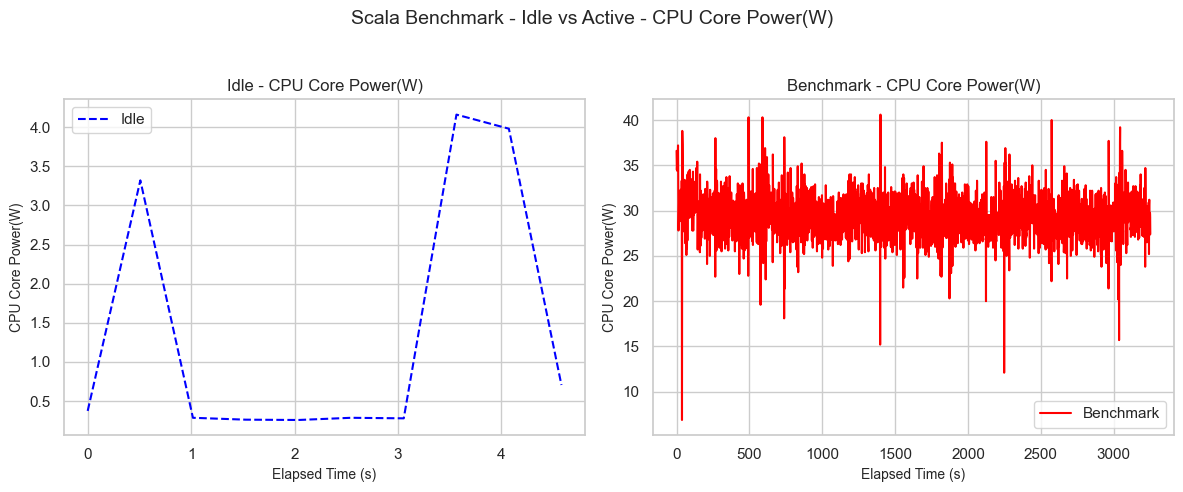

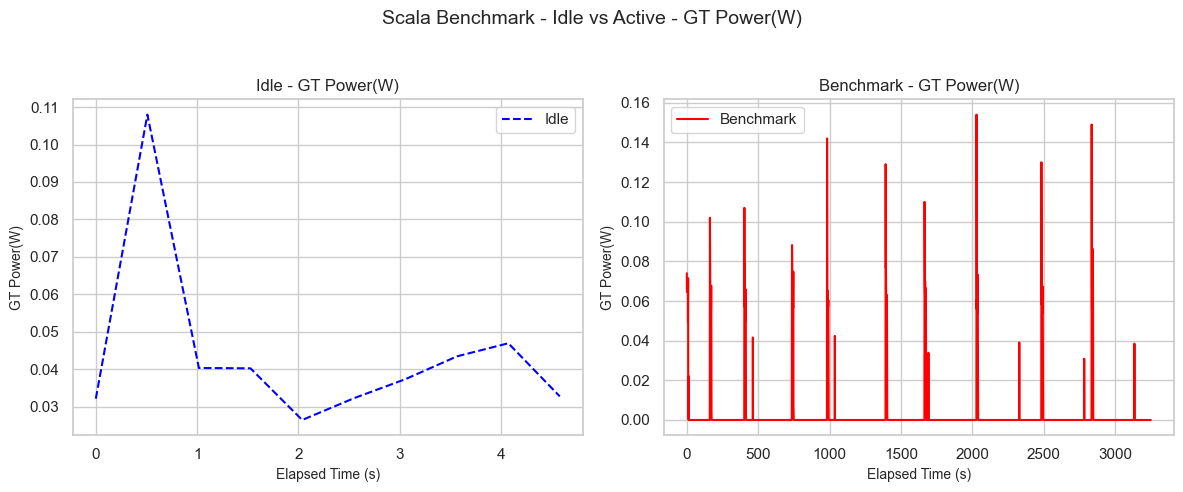

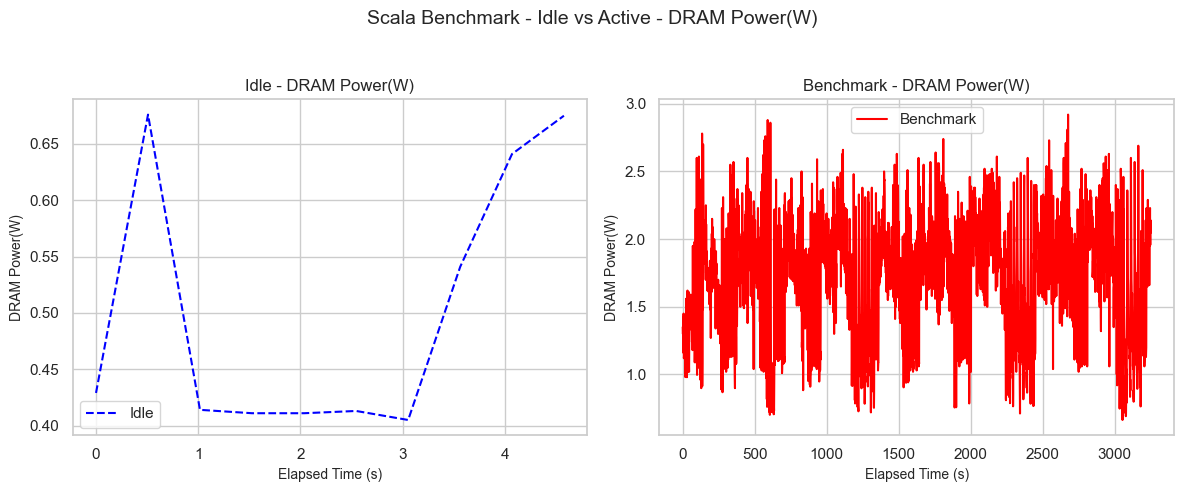

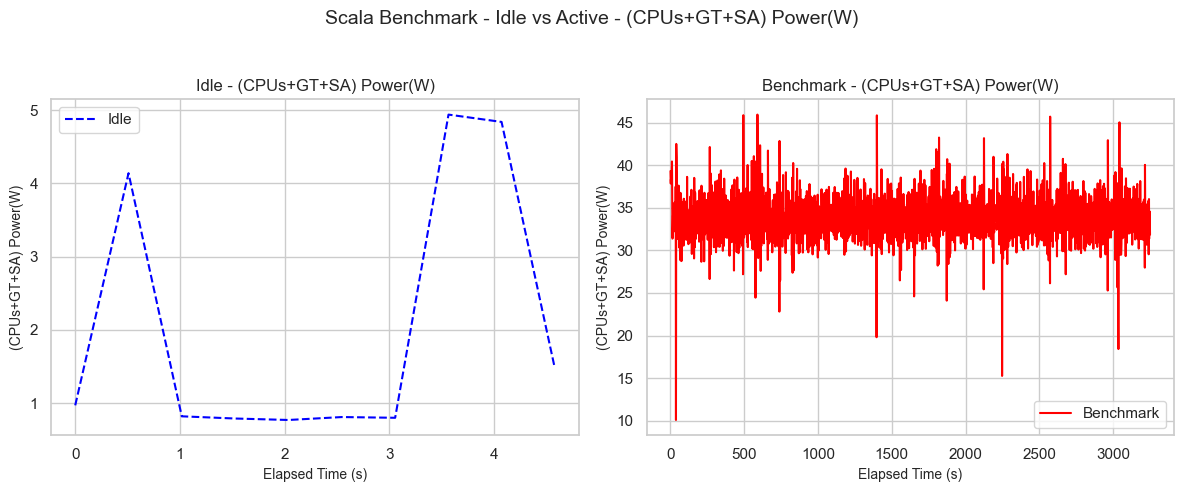

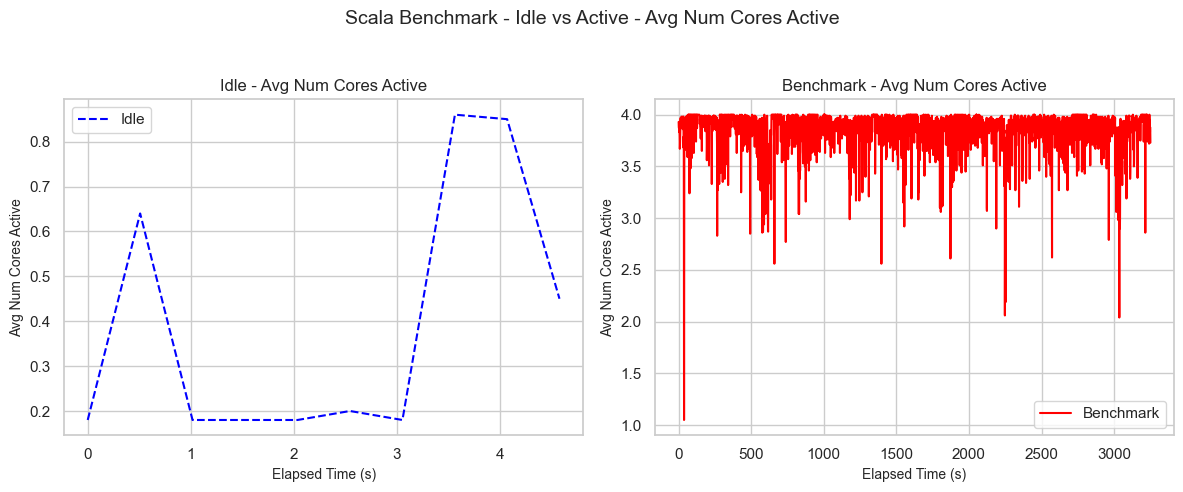

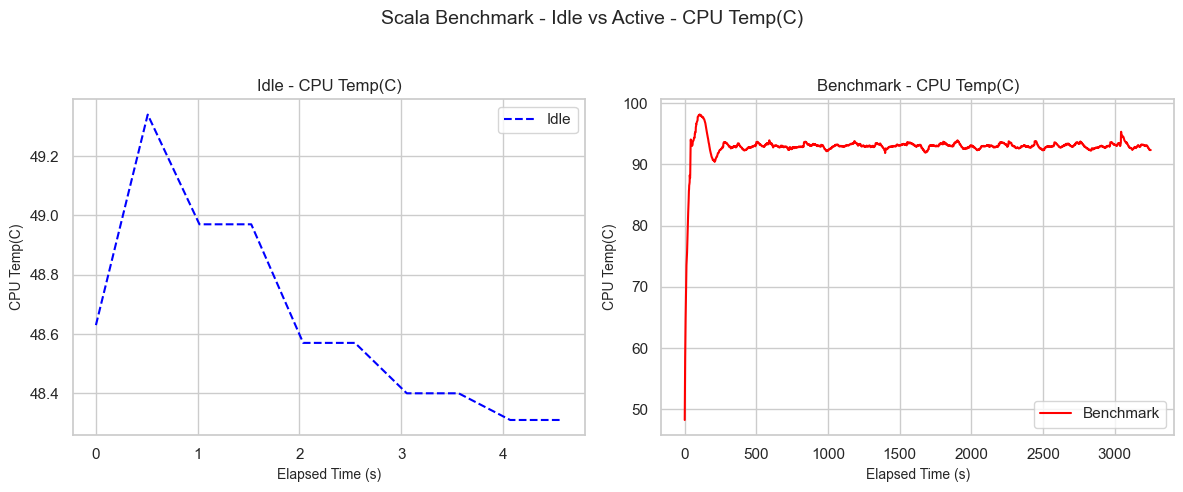

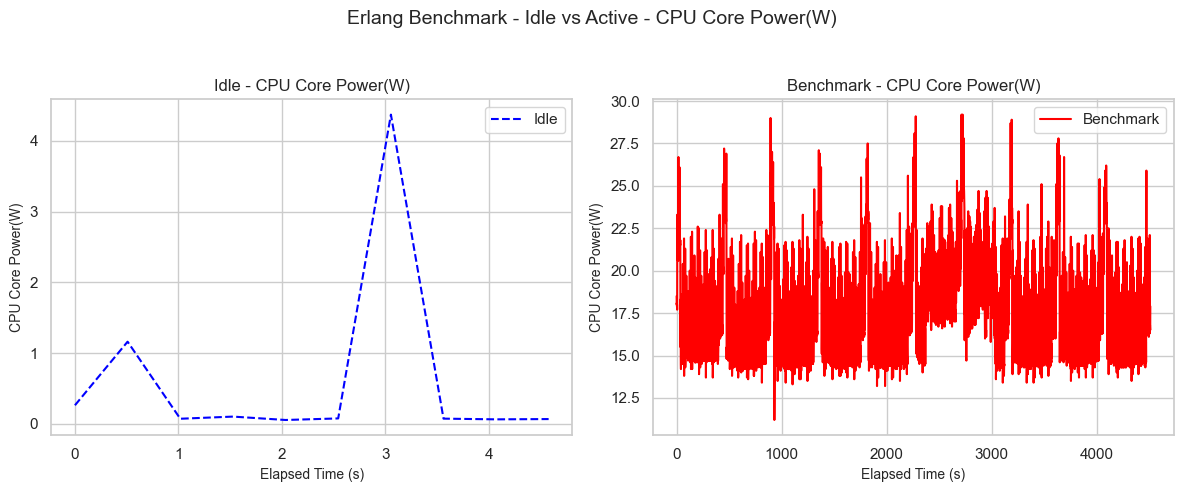

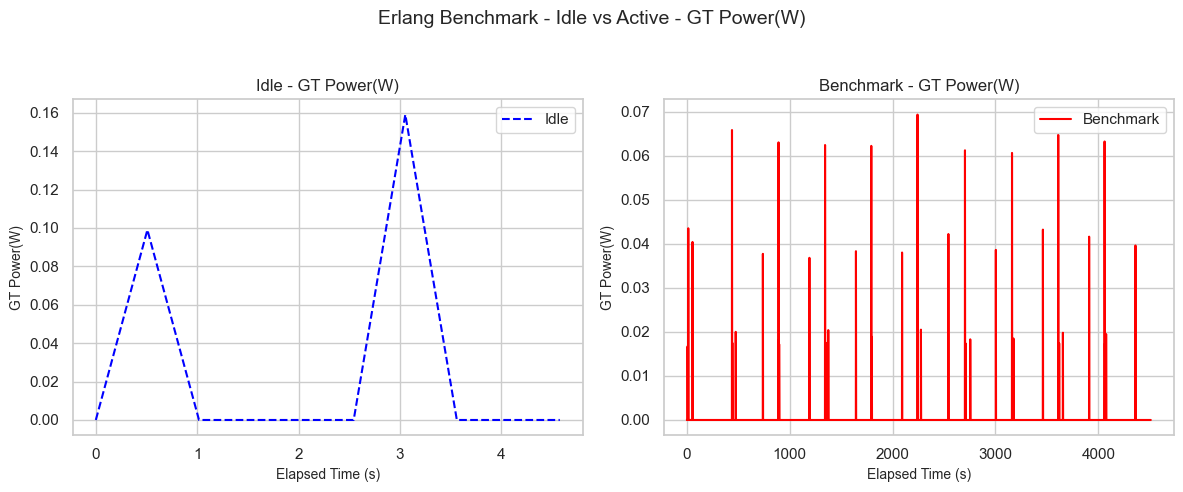

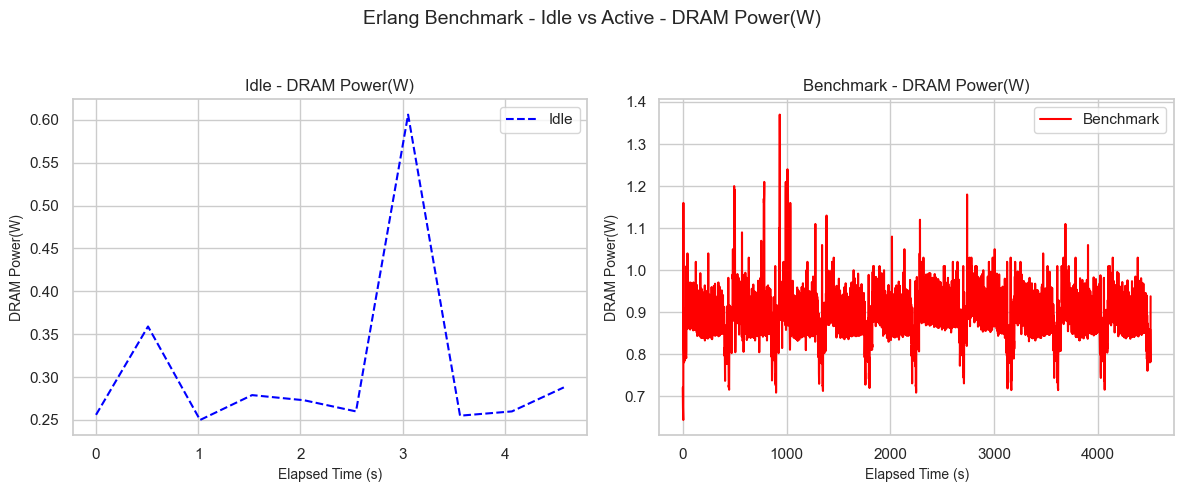

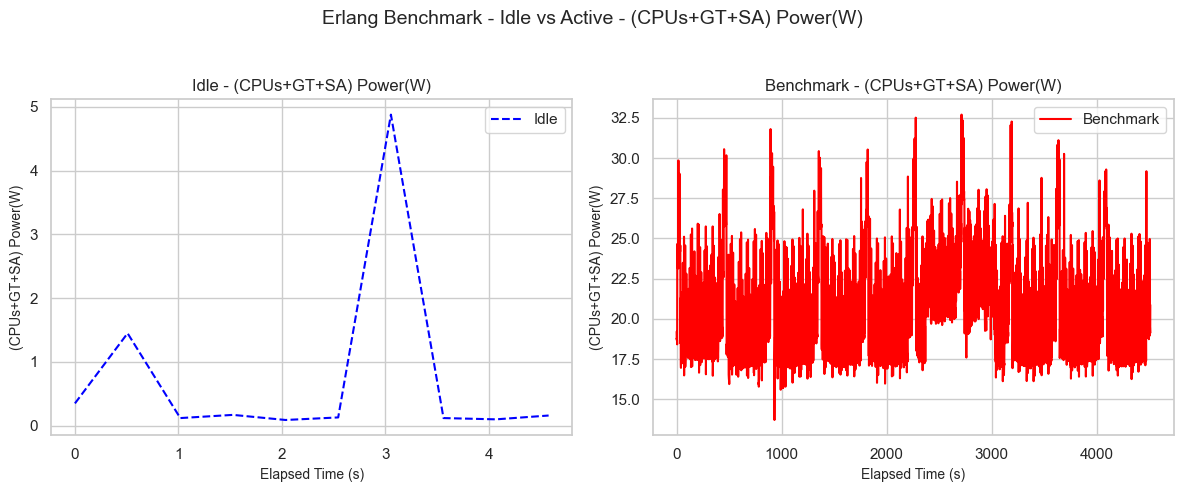

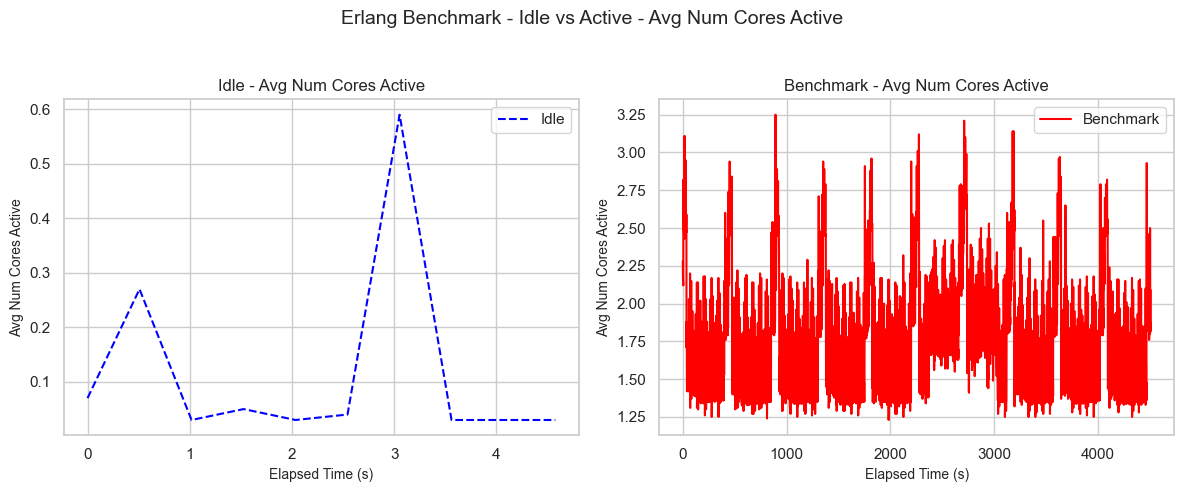

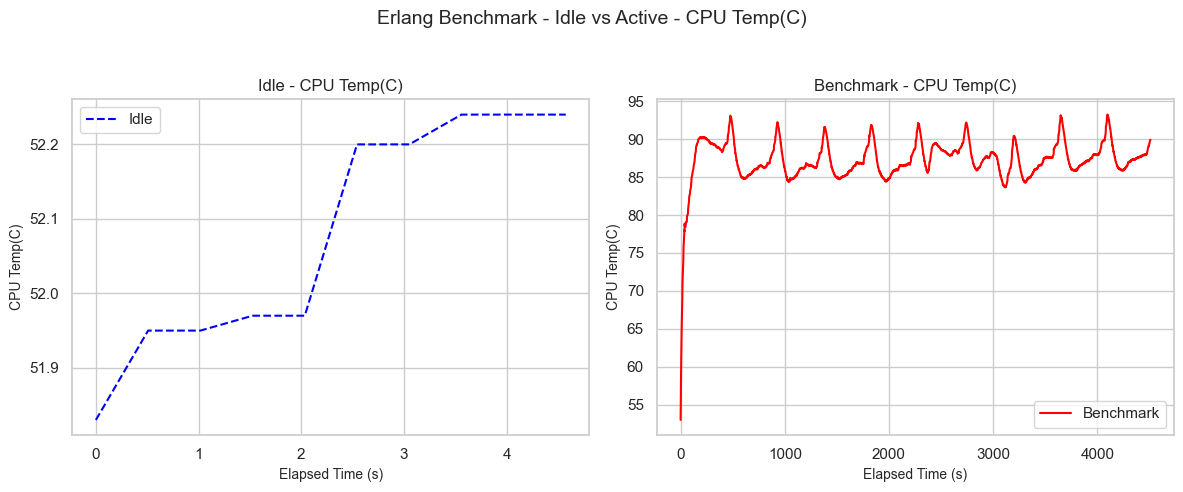

In [34]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [35]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [36]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

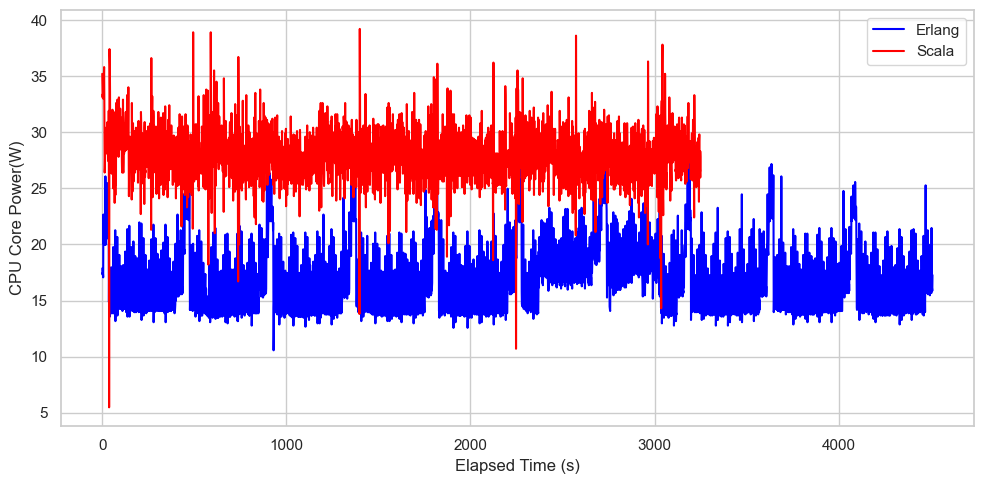

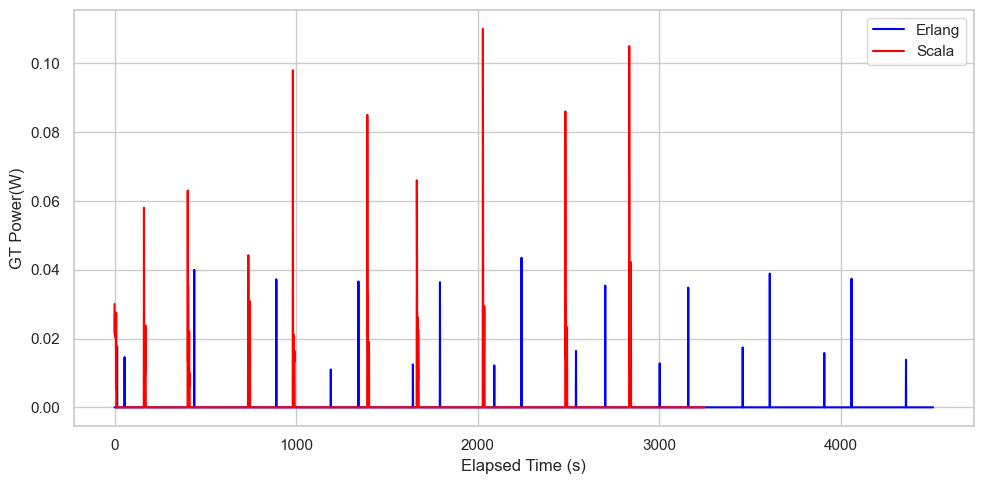

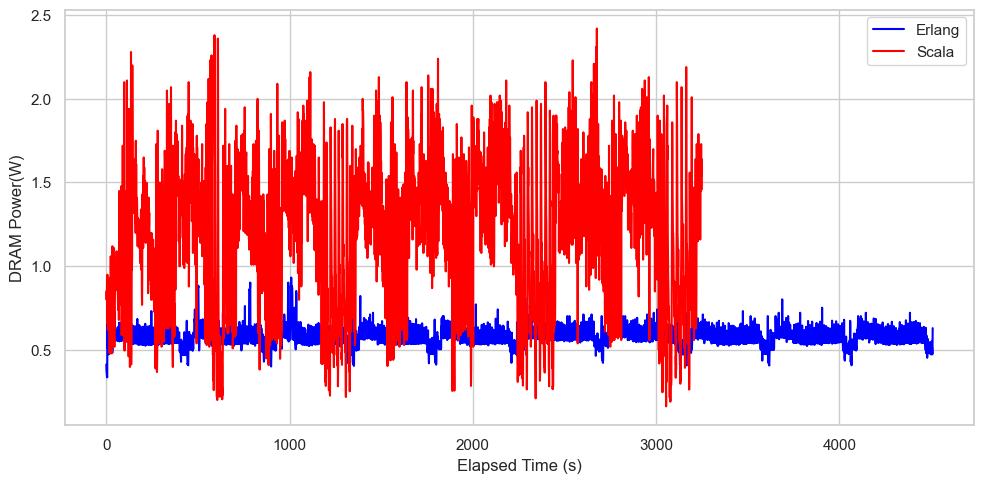

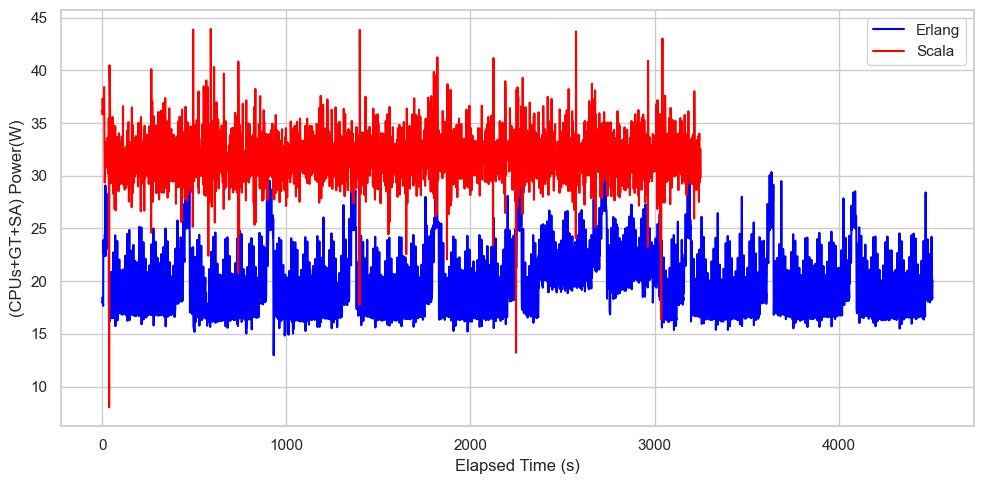

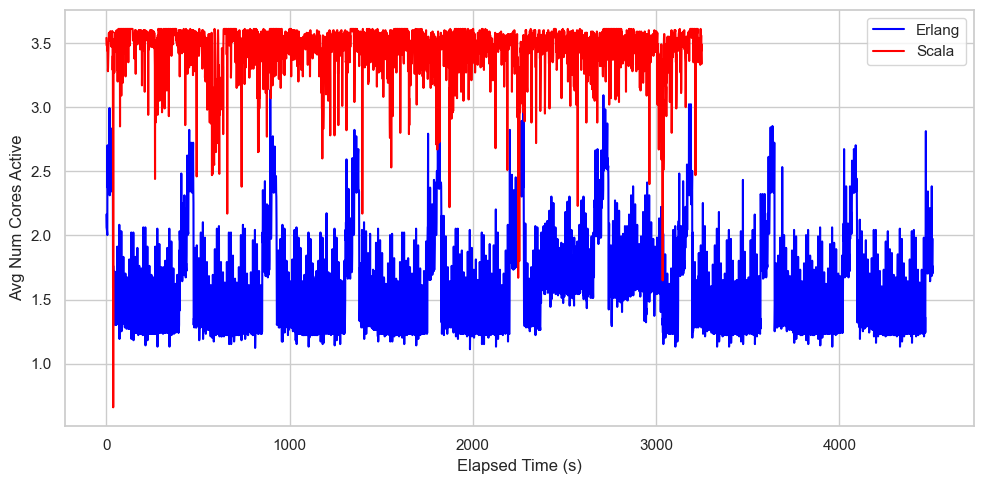

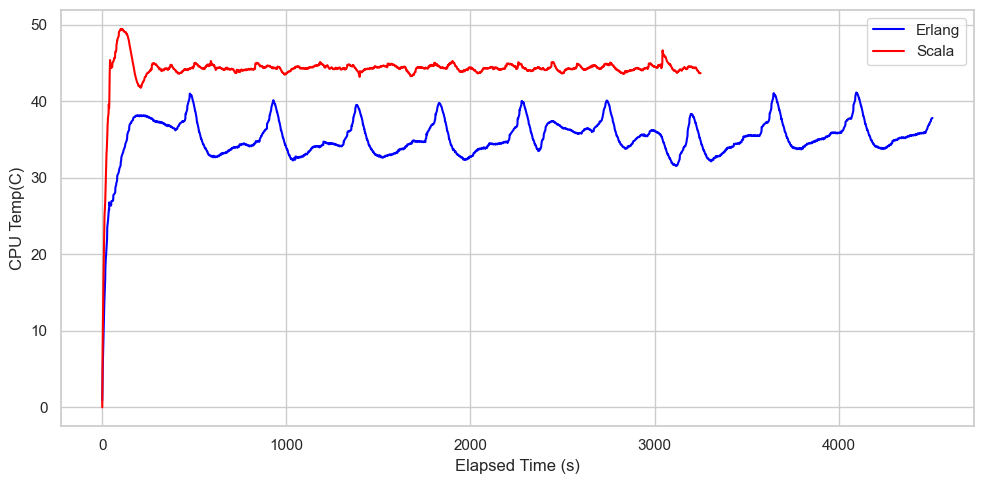

In [37]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [38]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [39]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         1.39100
GT Power(W)               0.04395
DRAM Power(W)             0.50160
(CPUs+GT+SA) Power(W)     2.03600
CPU Temp(C)              48.64700
Avg Num Cores Active      0.39000
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         0.62915
GT Power(W)               0.02580
DRAM Power(W)             0.30860
(CPUs+GT+SA) Power(W)     0.75700
CPU Temp(C)              52.07900
Avg Num Cores Active      0.11700
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        29.282456
GT Power(W)               0.002326
DRAM Power(W)             1.684369
(CPUs+GT+SA) Power(W)    33.778843
CPU Temp(C)              92.879852
Avg Num Cores Active      3.850226
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        16.611568
GT Power(W)               0.000304
DRAM Power(W)             0.872540
(CPUs+GT+SA) Power(W)    19.480719
CPU Temp(C)              87.252070
Avg Num Cores Active      1.636228
dtype: float64 

Net Average 

Compute Total Energy Consumption

In [40]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
     "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/4/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 94524.17080033373 Joules
Erlang Benchmark: 74634.18925099292 Joules
